# Correlation

Make a correlation map of all the symbols in a portfolio

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd

import pinkfish as pf

# Format price data.
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# Set size of inline plots.
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

In [3]:
symbols = ['SPY', 'GLD', 'BOND', 'EEM', 'IYR', 
           'JNK', 'LQD', 'NLY',  'PFF', 'PGX',
           'SLY', 'TIP', 'TLT',  'BSV', 'VNQ']
#symbols = ['GLD', 'GDX']
#symbols = ['SPY', '^GSPC']
#symbols = ['LQD', 'TLT']

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime.now()

In [4]:
# Fetch timeseries
portfolio = pf.Portfolio()
ts = portfolio.fetch_timeseries(symbols, start, end, fields=['close'])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
ts, start = portfolio.finalize_timeseries(ts, start)

,JNK,PFF,SLY,TIP,BSV,IYR,GLD,EEM,BOND,LQD,PGX,TLT,SPY,NLY,VNQ
JNK,1.00,0.80,0.80,0.47,0.58,0.75,0.35,0.65,0.60,0.72,0.72,0.38,0.80,0.61,0.75
PFF,0.80,1.00,0.76,0.49,0.56,0.70,0.33,0.60,0.62,0.68,0.94,0.43,0.75,0.53,0.70
SLY,0.80,0.76,1.00,0.31,0.33,0.80,0.23,0.70,0.36,0.48,0.61,0.12,0.92,0.61,0.82
TIP,0.47,0.49,0.31,1.00,0.68,0.41,0.53,0.12,0.74,0.70,0.51,0.68,0.28,0.43,0.41
BSV,0.58,0.56,0.33,0.68,1.00,0.42,0.46,0.22,0.85,0.81,0.60,0.71,0.32,0.38,0.41
IYR,0.75,0.70,0.80,0.41,0.42,1.00,0.29,0.56,0.46,0.55,0.59,0.25,0.82,0.66,1.00
GLD,0.35,0.33,0.23,0.53,0.46,0.29,1.00,0.29,0.46,0.41,0.35,0.34,0.19,0.28,0.29
EEM,0.65,0.60,0.70,0.12,0.22,0.56,0.29,1.00,0.24,0.36,0.47,0.05,0.71,0.43,0.57
BOND,0.60,0.62,0.36,0.74,0.85,0.46,0.46,0.24,1.00,0.88,0.64,0.83,0.35,0.42,0.45
LQD,0.72,0.68,0.48,0.70,0.81,0.55,0.41,0.36,0.88,1.00,0.68,0.83,0.47,0.44,0.55


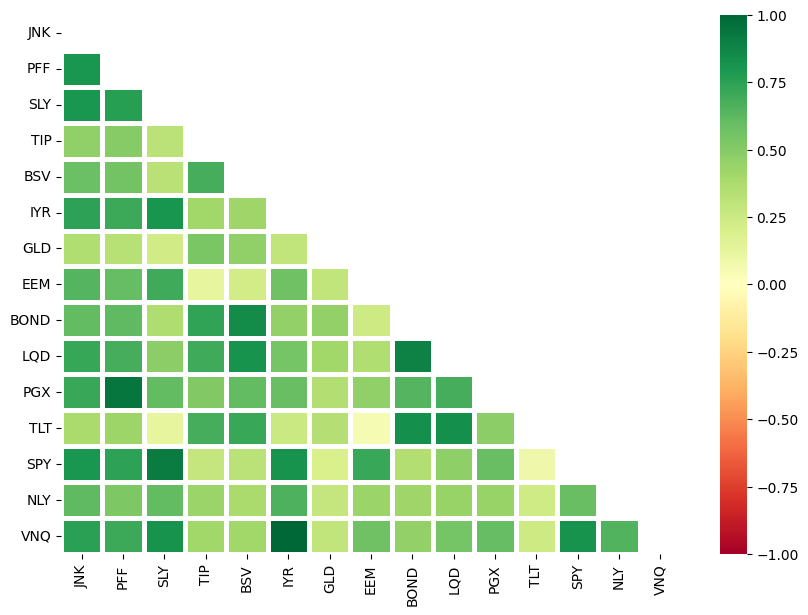

In [6]:
TRADING_DAYS_PER_YEAR, _, _ = pf.get_trading_days()
corr_df = portfolio.correlation_map(ts, method='log', days=TRADING_DAYS_PER_YEAR)
corr_df